<a href="https://colab.research.google.com/github/tinumide/udacity_artificial_intelligence/blob/master/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch


In [0]:
num_workers = 0
batch_size = 20
from torchvision import datasets, transforms
transform = transforms.ToTensor()
train_set = datasets.MNIST(root='data', download=True, train=True, transform=transform)
test_set = datasets.MNIST(root='data', download=True, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)



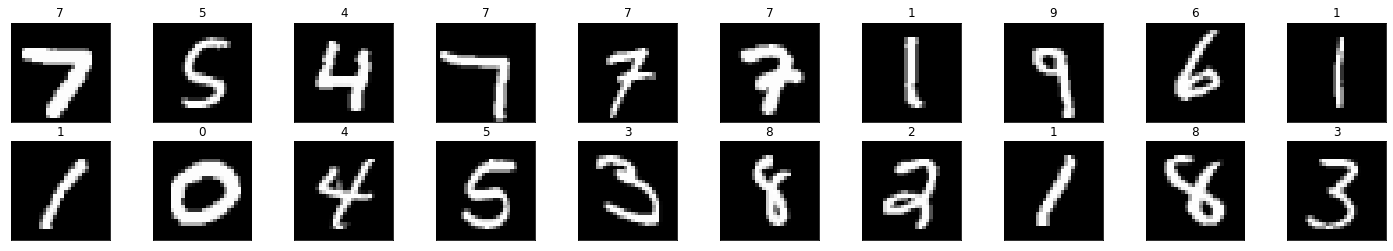

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

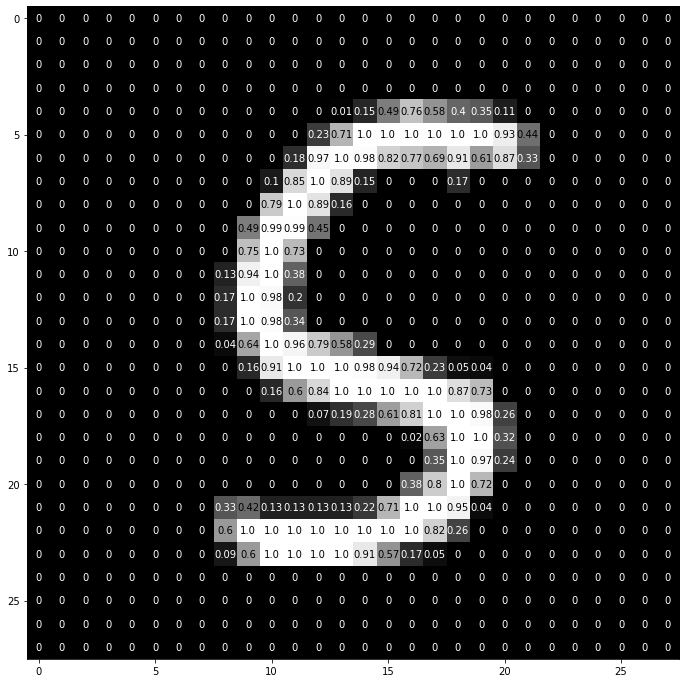

In [0]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [0]:
from collections import OrderedDict
from torch import optim, nn
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(784, 256)),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(256,64)),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(64,10)),
                      ('softmax', nn.LogSoftmax(dim=1))]))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.003)


In [0]:
epochs = 10
for e in range(epochs):
  train_loss = 0
  for images, labels in train_loader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  print(f"Training loss: {train_loss/len(train_loader)}")
  # print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.27456024539719026
Training loss: 0.2575227144540598
Training loss: 0.24218447951662045
Training loss: 0.2282440090154608
Training loss: 0.21510094109270722
Training loss: 0.2029286513486877
Training loss: 0.19186414869331445
Training loss: 0.18173272807120036
Training loss: 0.17244356764635693
Training loss: 0.16375140577104563


In [0]:
#Testing the trained network
test_loss = 0 
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
model.eval() #prepares model for evaluation mode more like removes the effect of droput layer
for images, labels in test_loader:
  images = images.view(images.shape[0], -1)
  output = model(images)
  loss = criterion(output, labels)
  test_loss += loss.item()
  _, pred = torch.max(output, 1) 
  correct = np.squeeze(pred.eq(labels.data.view_as(pred)))
  # calculate test accuracy for each object class
  for i in range(batch_size):
    label = labels.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] += 1
test_loss = test_loss/len(test_loader)
print(f"Test_loss:{test_loss}")
for i in range(10):
  if class_total[i] > 0:
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
    str(i), 100 * class_correct[i] / class_total[i],
    np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
    print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


Test_loss:0.15948342462442816
Test Accuracy of     0: 98% (964/980)
Test Accuracy of     1: 98% (1118/1135)
Test Accuracy of     2: 95% (985/1032)
Test Accuracy of     3: 95% (965/1010)
Test Accuracy of     4: 95% (939/982)
Test Accuracy of     5: 93% (831/892)
Test Accuracy of     6: 96% (922/958)
Test Accuracy of     7: 94% (968/1028)
Test Accuracy of     8: 93% (906/974)
Test Accuracy of     9: 92% (938/1009)

Test Accuracy (Overall): 95% (9536/10000)


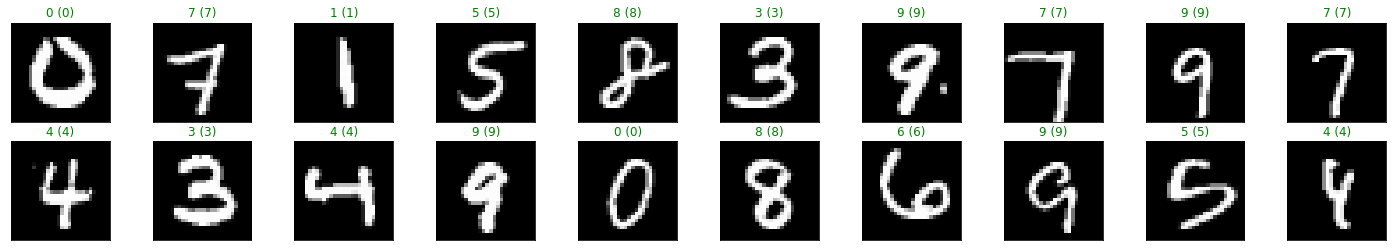

In [0]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.view(images.shape[0], -1)
# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
# images = images[0].view(1, 784)
images = images.reshape((20, 1, 28,28))
images = images.numpy()
# images = images[0].view(1, 784)
# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))